In [8]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

%matplotlib inline

In [12]:
x1= np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2= np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X= np.array(list(zip(x1,x2))).reshape(len(x1),2)


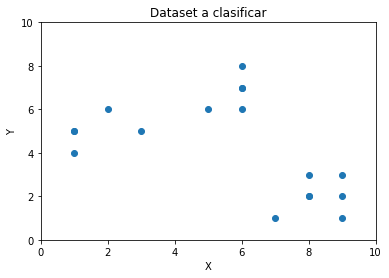

In [14]:
plt.plot()
plt.xlim([0,10])
plt.ylim([0,10])
plt.title("Dataset a clasificar")
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(x1,x2)
plt.show()

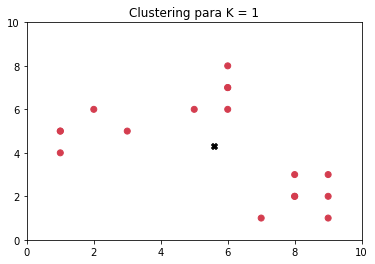

* Para k =  2  el promedio de silueta es de:  0.6113424368705715
      - Para i =  1  La silueta cluster vale:  0.7746251901389686
      - Para i =  2  La silueta cluster vale:  0.49704450958269375


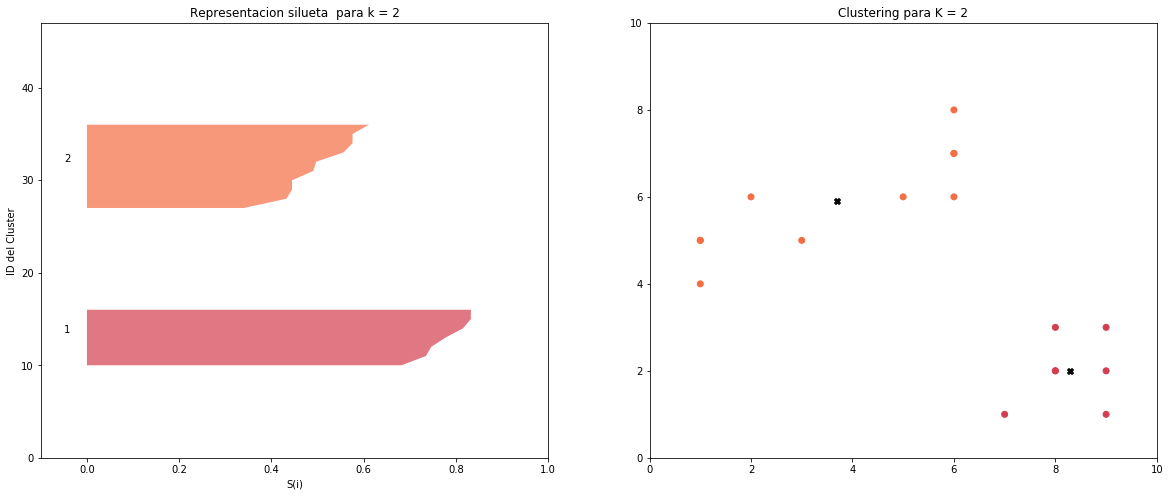

* Para k =  3  el promedio de silueta es de:  0.7122079383287169
      - Para i =  1  La silueta cluster vale:  0.6609508863896014
      - Para i =  2  La silueta cluster vale:  0.7345257364682265
      - Para i =  3  La silueta cluster vale:  0.7322200728725188


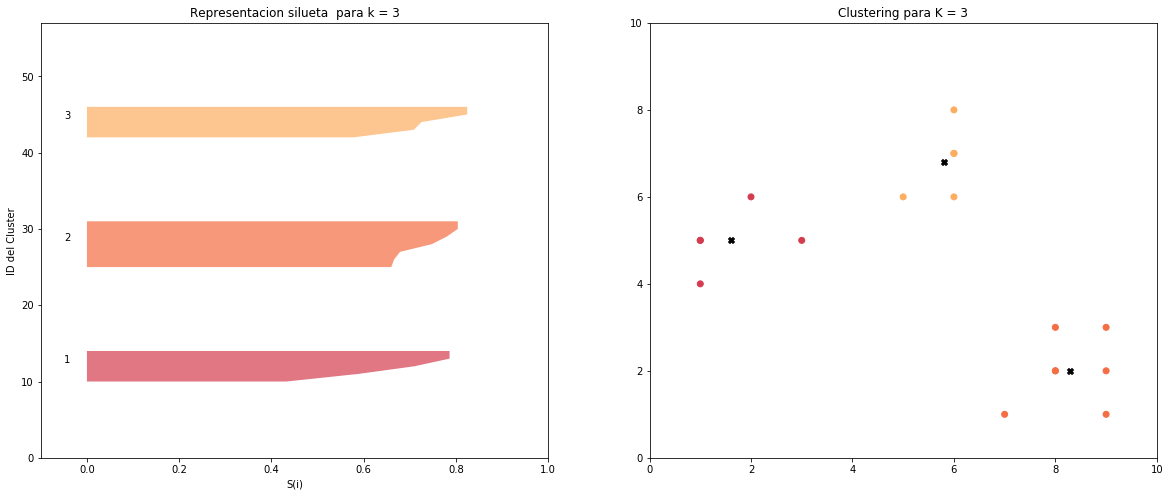

* Para k =  4  el promedio de silueta es de:  0.6389948643127632
      - Para i =  1  La silueta cluster vale:  0.654458796162702
      - Para i =  2  La silueta cluster vale:  0.655666655624379
      - Para i =  3  La silueta cluster vale:  0.7345257364682265
      - Para i =  4  La silueta cluster vale:  0.24096929517637128


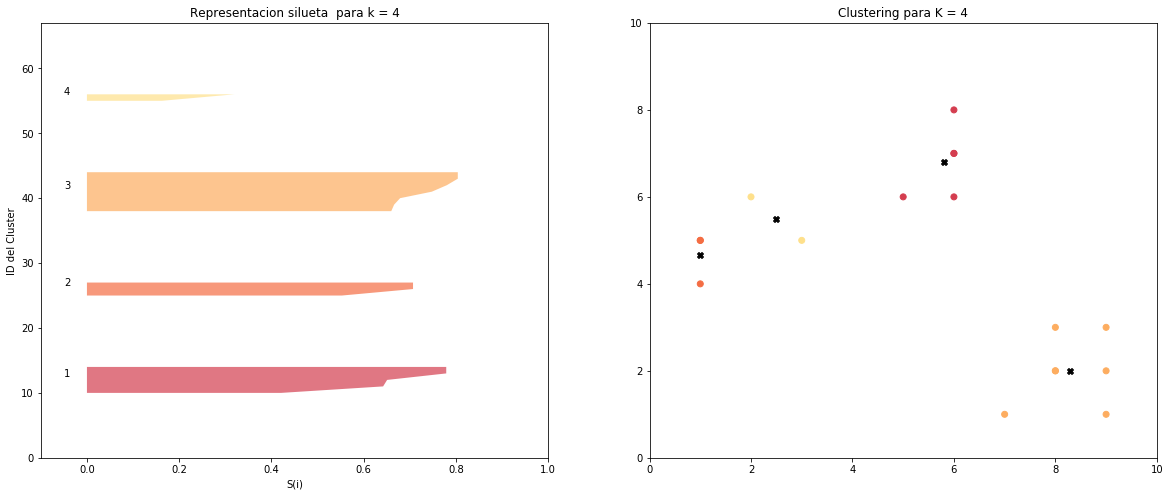

* Para k =  5  el promedio de silueta es de:  0.450456025779209
      - Para i =  1  La silueta cluster vale:  0.42346712707864664
      - Para i =  2  La silueta cluster vale:  0.24096929517637128
      - Para i =  3  La silueta cluster vale:  0.654458796162702
      - Para i =  4  La silueta cluster vale:  -0.09040786759303471
      - Para i =  5  La silueta cluster vale:  0.655666655624379


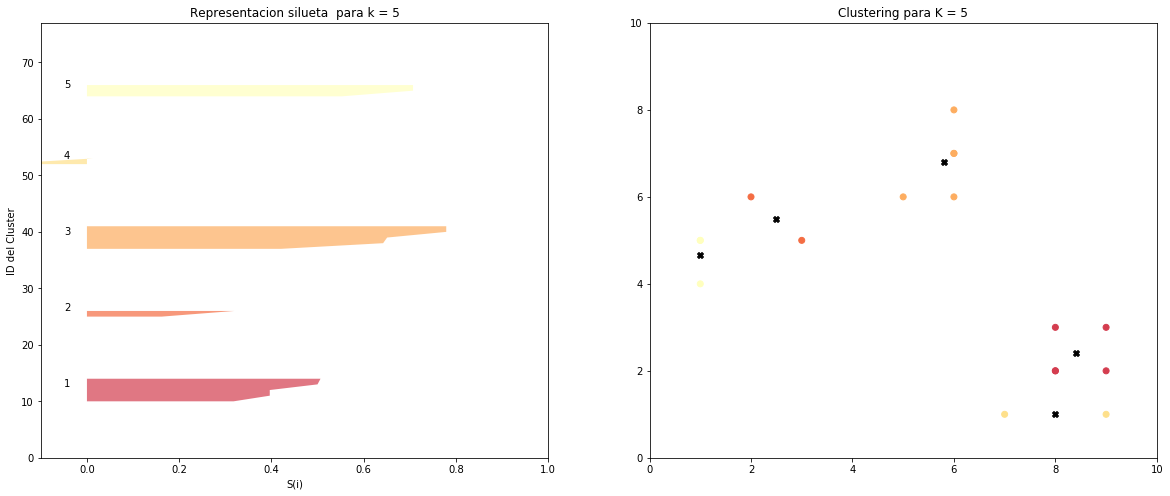

* Para k =  6  el promedio de silueta es de:  0.4159974962395202
      - Para i =  1  La silueta cluster vale:  0.32882042637679976
      - Para i =  2  La silueta cluster vale:  0.37765685097302226
      - Para i =  3  La silueta cluster vale:  0.655666655624379
      - Para i =  4  La silueta cluster vale:  0.24096929517637128
      - Para i =  5  La silueta cluster vale:  0.5664789734180768
      - Para i =  6  La silueta cluster vale:  0.0


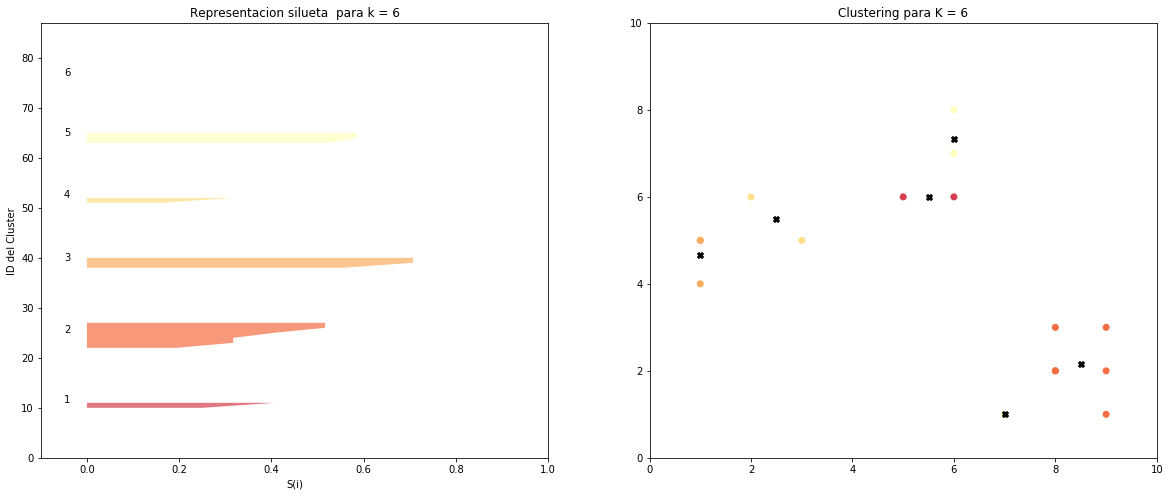

* Para k =  7  el promedio de silueta es de:  0.32151719114626565
      - Para i =  1  La silueta cluster vale:  0.30004208861569454
      - Para i =  2  La silueta cluster vale:  0.24096929517637128
      - Para i =  3  La silueta cluster vale:  0.30272654110449826
      - Para i =  4  La silueta cluster vale:  0.655666655624379
      - Para i =  5  La silueta cluster vale:  0.0
      - Para i =  6  La silueta cluster vale:  0.3028895866899326
      - Para i =  7  La silueta cluster vale:  0.0


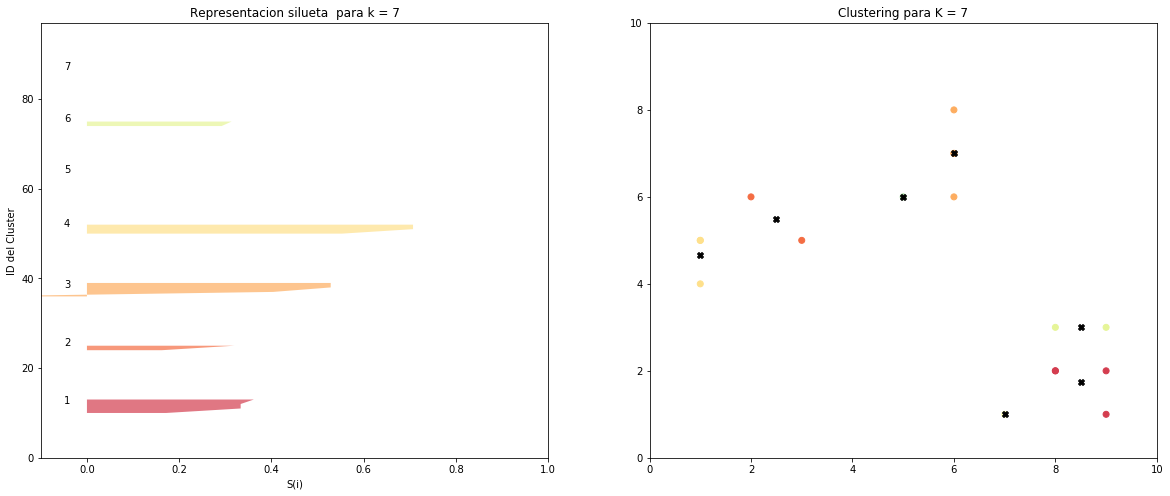

* Para k =  8  el promedio de silueta es de:  0.35345323083317454
      - Para i =  1  La silueta cluster vale:  0.30004208861569454
      - Para i =  2  La silueta cluster vale:  0.6152265411044983
      - Para i =  3  La silueta cluster vale:  0.5664789734180768
      - Para i =  4  La silueta cluster vale:  0.0
      - Para i =  5  La silueta cluster vale:  0.32882042637679976
      - Para i =  6  La silueta cluster vale:  0.3028895866899326
      - Para i =  7  La silueta cluster vale:  0.0
      - Para i =  8  La silueta cluster vale:  0.0


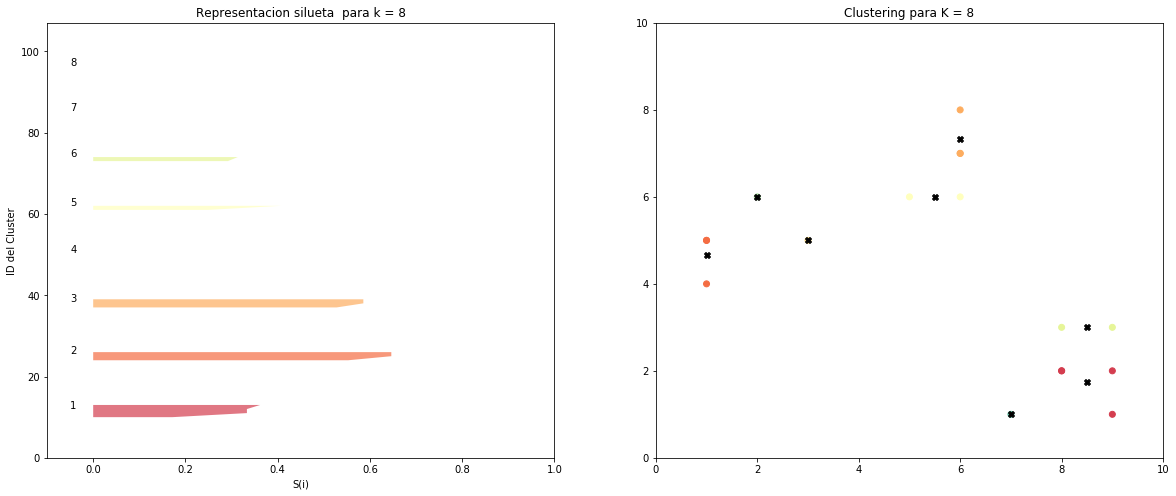

* Para k =  9  el promedio de silueta es de:  0.33895832481986593
      - Para i =  1  La silueta cluster vale:  0.6152265411044983
      - Para i =  2  La silueta cluster vale:  0.10819418755438788
      - Para i =  3  La silueta cluster vale:  0.5664789734180768
      - Para i =  4  La silueta cluster vale:  0.4477152501692066
      - Para i =  5  La silueta cluster vale:  0.0
      - Para i =  6  La silueta cluster vale:  0.0
      - Para i =  7  La silueta cluster vale:  0.0
      - Para i =  8  La silueta cluster vale:  0.0
      - Para i =  9  La silueta cluster vale:  0.32882042637679976


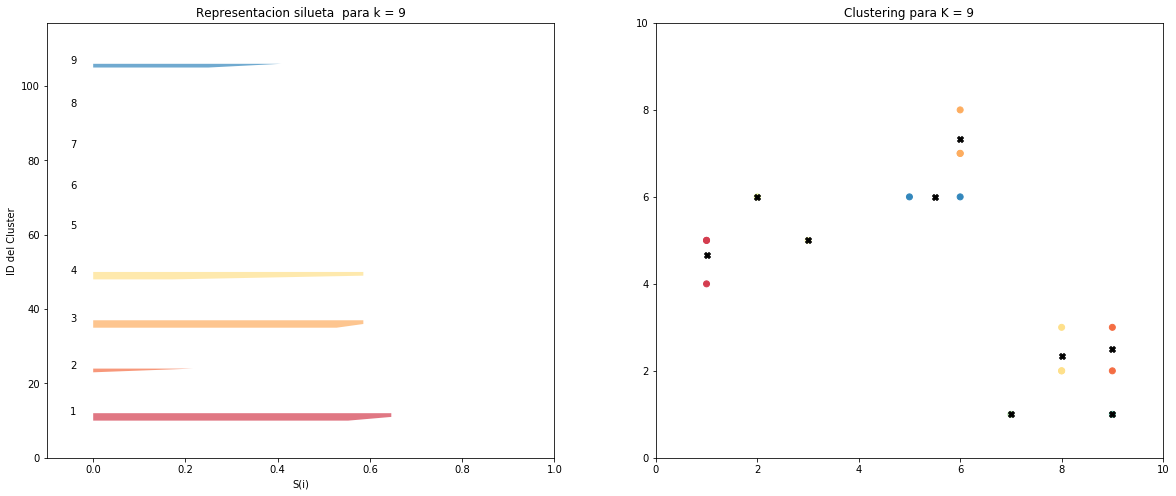

* Para k =  10  el promedio de silueta es de:  0.39555054586787364
      - Para i =  1  La silueta cluster vale:  0.14644660940672627
      - Para i =  2  La silueta cluster vale:  0.6152265411044983
      - Para i =  3  La silueta cluster vale:  1.0
      - Para i =  4  La silueta cluster vale:  0.14644660940672627
      - Para i =  5  La silueta cluster vale:  0.0
      - Para i =  6  La silueta cluster vale:  0.0
      - Para i =  7  La silueta cluster vale:  0.0
      - Para i =  8  La silueta cluster vale:  0.14644660940672627
      - Para i =  9  La silueta cluster vale:  0.0
      - Para i =  10  La silueta cluster vale:  1.0


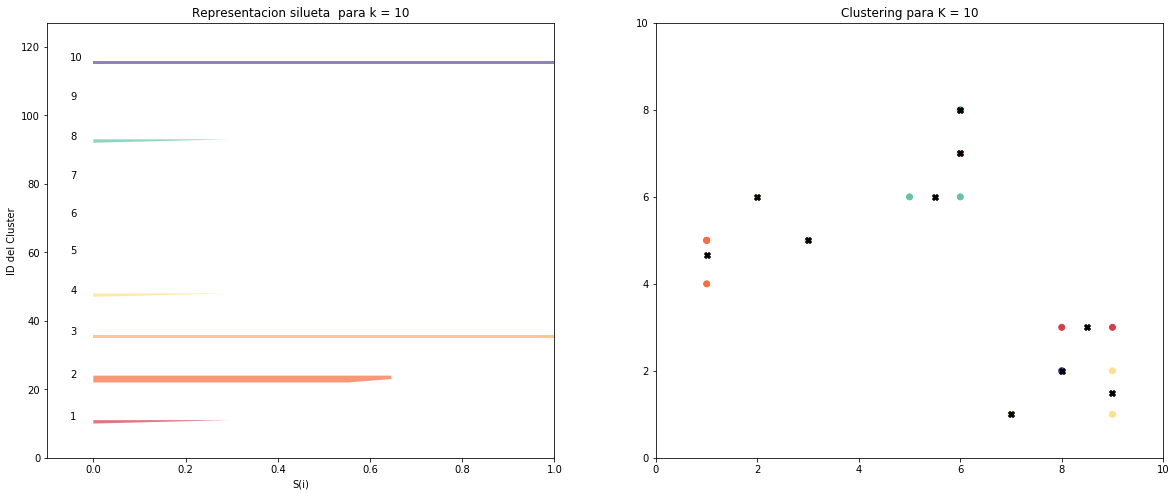

In [48]:
# Numero de iteraciones (Cluster)  max
max_k=10
K=range(1,max_k+1)
ssw = []
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst=sum(np.min(cdist(X,centroid, "euclidean"), axis=1))


for k in K:
    kmeanModel=KMeans(n_clusters= k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels=kmeanModel.labels_
    
    
    ssw_k=sum(np.min(cdist(X,kmeanModel.cluster_centers_, "euclidean"), axis=1))
    ssw.append(ssw_k)
    label_color=[color_palette[i] for i in labels]

    ## Fabricar la silueta para cada cluster
    # NO hacemos silueta si: K=1 o K=len(X)
    if 1<k<len(X):
        # Crear un subplot de una fila y dos columnas
        fig, (axis1,axis2)= plt.subplots(1,2)
        fig.set_size_inches(20,8)
        
        #El primer subplot contendra la silueta que puede tener valores desde = -1 a  1
        # EN este caso , se controla que los valores estan entre -0.1 y 1
        axis1.set_xlim([-0.1,1])
        # el número de cluster a insertar determina el tamaño de cada barra
        
        # EL COEF de (Ncluster+1)*10 será el espacio en blanco que se dejará entre siluetas individuales
        # De daca cluser para separarlas
        FF=10
        axis1.set_ylim((0, len(X)+(k+1)*FF))
        silhouette_avg=silhouette_score(X,labels)
        print("* Para k = ",k, " el promedio de silueta es de: ", silhouette_avg )
        sample_silhouette_values =  silhouette_samples(X,labels)
        y_lower=10
        
        for i in range(k):
            # Agregamos la Silueta del cliuster k i-esimo ith
            ith_cluster_sv= sample_silhouette_values[labels == i]
            print("      - Para i = ", i+1, " La silueta cluster vale: ", np.mean(ith_cluster_sv))
            # ORdenar descendientemente las siluetas del cluster i-esimo
            
            
            ith_cluster_sv.sort()
            #Calcular donde ubicar la primera silueta en el eje vertical
            ith_cluster_size= ith_cluster_sv.shape[0]
            y_upper= y_lower+ith_cluster_size
            
            # Elegir el color del cluster
            color= color_palette[i]
            alph=0.7
            
            axis1.fill_betweenx(np.arange(y_lower,y_upper),
                               0, ith_cluster_sv, facecolor= color, alpha=alph)
            
            #Etiquetamos dicho cluster con el numero en el centro
            axis1.text(-0.05, y_lower+0.5*ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente cluster del grafico
            y_lower=y_upper +10 # Dejar vacias 10 posiciones sin myuestra
        
        axis1.set_title("Representacion silueta  para k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        
        ##FIn de la representación de la silueta
        
    ## Plot de los k-means con los puntos respectivos
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title("Clustering para K = %s"%str(k))
    plt.scatter(x1,x2, c=label_color)
    plt.scatter(centers[0], centers[1],  marker ="X", c="k")
    plt.show()
            

Text(0.5, 1.0, 'Tecnica del codo para encontrar el K Optimo')

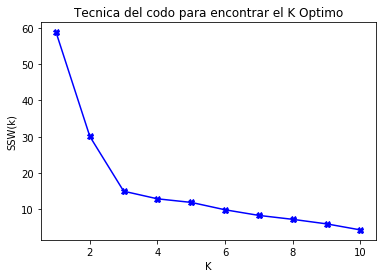

In [51]:
### Representación del codo
plt.plot(K,ssw,"bX-")
plt.xlabel("K")
plt.ylabel("SSW(k)")
plt.title("Tecnica del codo para encontrar el K Optimo")

Text(0.5, 1.0, 'Tecnica del codo para encontrar el K Optimo normaliado')

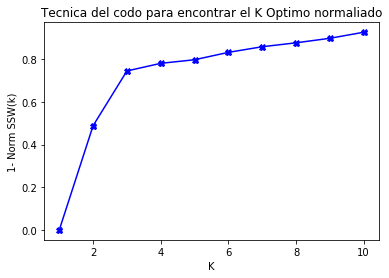

In [52]:
### Representacion del codo normalizadio
plt.plot(K, 1-ssw/sst, "bX-")
plt.xlabel("K")
plt.ylabel("1- Norm SSW(k)")
plt.title("Tecnica del codo para encontrar el K Optimo normaliado")